# Decision trees
### Gini Impurity (基尼不純度)
是一種衡量資料集中不同分類混合程度的指標，主要用於決策樹中，幫助選擇最佳的分割方式。基尼不純度越低，表示該節點的分類越純（同類資料集中在一起）。
基尼不純度幫助衡量資料的分類效果。在決策樹中，通過每次分割降低基尼不純度，模型能逐步形成更準確的分類結果。
G = 1 - (Pa^2 + Pb^2)

### Information Gain (IG,資訊增益)
是一種用來評估特徵分割效果的指標，在決策樹演算法中尤為重要。它量化了某個特徵分割後，資料的不確定性(熵，Entropy)降低了多少。資訊增益越高，代表該特徵對資料分類的效果越好。


In [1]:
# 定義計算 Gini Impurity 和 Information Gain 的函數
def gini(data):
    """計算 Gini 不純度"""
    data = pd.Series(data)  # 將資料轉換為 pandas Series
    return 1 - sum(data.value_counts(normalize=True) ** 2)  # Gini Impurity 計算公式

def info_gain(left, right, current_impurity):
    """計算信息增益，根據左右分支的 Gini 不純度和當前分支的 Gini 不純度"""
    w = float(len(left)) / (len(left) + len(right))  # 左邊分支的權重
    # 計算信息增益
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 讀取資料集，並設置列名
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                 names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])

# 將 'accep' 目標列中的 'unacc' 轉換為 0，其它（acceptable）的值轉換為 1
df['accep'] = ~(df['accep'] == 'unacc')  # 1 表示可接受，0 表示不可接受

# 資料集的特徵（從第1列到第6列），目標是 'accep'（是否可接受）
X = pd.get_dummies(df.iloc[:, 0:6])  # 使用 pandas 的 `get_dummies` 將類別特徵轉換為虛擬變量
y = df['accep']  # 目標變量 'accep'

# 將資料集拆分為訓練集（80%）和測試集（20%），並設定隨機種子
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# 計算特徵 'persons_2' 分割後的樣本數量
# 左邊分支（'persons_2' == 0）和右邊分支（'persons_2' == 1）
left = y_train[x_train['persons_2'] == 0]
right = y_train[x_train['persons_2'] == 1]

# 計算左右分支的樣本數量
len_left = len(left)
len_right = len(right)

print('No. of cars with persons_2 == 0:', len_left)  # 顯示 'persons_2' == 0 的車輛數量
print('No. of cars with persons_2 == 1:', len_right)  # 顯示 'persons_2' == 1 的車輛數量

# 計算 Gini 不純度
gi = gini(y_train)  # 計算訓練集的整體 Gini 不純度
gini_left = gini(left)  # 計算左邊分支的 Gini 不純度
gini_right = gini(right)  # 計算右邊分支的 Gini 不純度

print('Left split gini impurity:', gini_left)  # 顯示左邊分支的 Gini 不純度
print('Right split gini impurity:', gini_right)  # 顯示右邊分支的 Gini 不純度

# 計算特徵 'persons_2' 的信息增益
info_gain_persons_2 = info_gain(left, right, gi)
print(f'Information gain for persons_2:', info_gain_persons_2)  # 顯示 'persons_2' 的信息增益

# 計算每個特徵的最大信息增益
info_gain_list = []
for i in x_train.columns:
    left = y_train[x_train[i] == 0]  # 左邊分支：特徵值為 0 的資料
    right = y_train[x_train[i] == 1]  # 右邊分支：特徵值為 1 的資料
    # 計算該特徵的情報增益
    info_gain_list.append([i, info_gain(left, right, gi)])

# 創建 DataFrame 顯示所有特徵的信息增益，並按增益排序
info_gain_table = pd.DataFrame(info_gain_list).sort_values(1, ascending=False)

# 顯示信息增益最大的一個特徵
print(info_gain_table.iloc[0, :][0])  # 顯示信息增益最大的特徵名稱
print(f'Greatest impurity gain at:{info_gain_table.iloc[0, :]}')  # 顯示信息增益最大的特徵及其增益值
print(info_gain_table)  # 顯示所有特徵的信息增益

No. of cars with persons_2 == 0: 917
No. of cars with persons_2 == 1: 465
Left split gini impurity: 0.49485722848081015
Right split gini impurity: 0.0
Information gain for persons_2: 0.09013468781461476
safety_low
Greatest impurity gain at:0    safety_low
1      0.091603
Name: 19, dtype: object
                 0         1
19      safety_low  0.091603
12       persons_2  0.090135
18     safety_high  0.045116
14    persons_more  0.025261
13       persons_4  0.020254
7      maint_vhigh  0.013622
3     buying_vhigh  0.011001
20      safety_med  0.008480
17  lug_boot_small  0.006758
1       buying_low  0.006519
5        maint_low  0.005343
6        maint_med  0.004197
15    lug_boot_big  0.003913
2       buying_med  0.003338
8          doors_2  0.002021
0      buying_high  0.001094
4       maint_high  0.000530
10         doors_4  0.000423
16    lug_boot_med  0.000386
11     doors_5more  0.000325
9          doors_3  0.000036


# Decision trees using scikit-learn

In [3]:
# 引入必要的庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# 讀取車輛資料集，並為各列設置名稱
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                 names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])

# 將 'accep' 列中的 'unacc' 轉換為 0（不可接受），其它（acceptable）轉換為 1（可接受）
df['accep'] = ~(df['accep'] == 'unacc')  # 1 表示可接受，0 表示不可接受

# 分割特徵變量（前6列）和目標變量（'accep'）
X = pd.get_dummies(df.iloc[:, 0:6])  # 使用 pandas 的 get_dummies 將類別變量轉換為虛擬變量
y = df['accep']  # 目標變量 'accep'（是否可接受）

# 將資料集拆分為訓練集和測試集（80% 訓練集，20% 測試集）
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# 創建決策樹模型並打印參數
dtree = DecisionTreeClassifier()  # 創建一個決策樹分類器
print(f'Decision Tree parameters: {dtree.get_params()}')  # 印出決策樹參數

# 在訓練集上訓練決策樹，並打印樹的深度
dtree.fit(x_train, y_train)  # 訓練決策樹模型
print(f'Decision tree depth: {dtree.get_depth()}')  # 輸出決策樹的深度

# 在測試集上進行預測，並計算模型在測試集上的準確度
y_pred = dtree.predict(x_test)  # 使用訓練好的模型對測試集進行預測
print(f'Test set accuracy: {dtree.score(x_test, y_test)}')  # 計算並顯示測試集的準確度
# 或者也可以使用 accuracy_score 函數來計算準確度
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')

Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Decision tree depth: 11
Test set accuracy: 0.976878612716763
Test set accuracy: 0.976878612716763


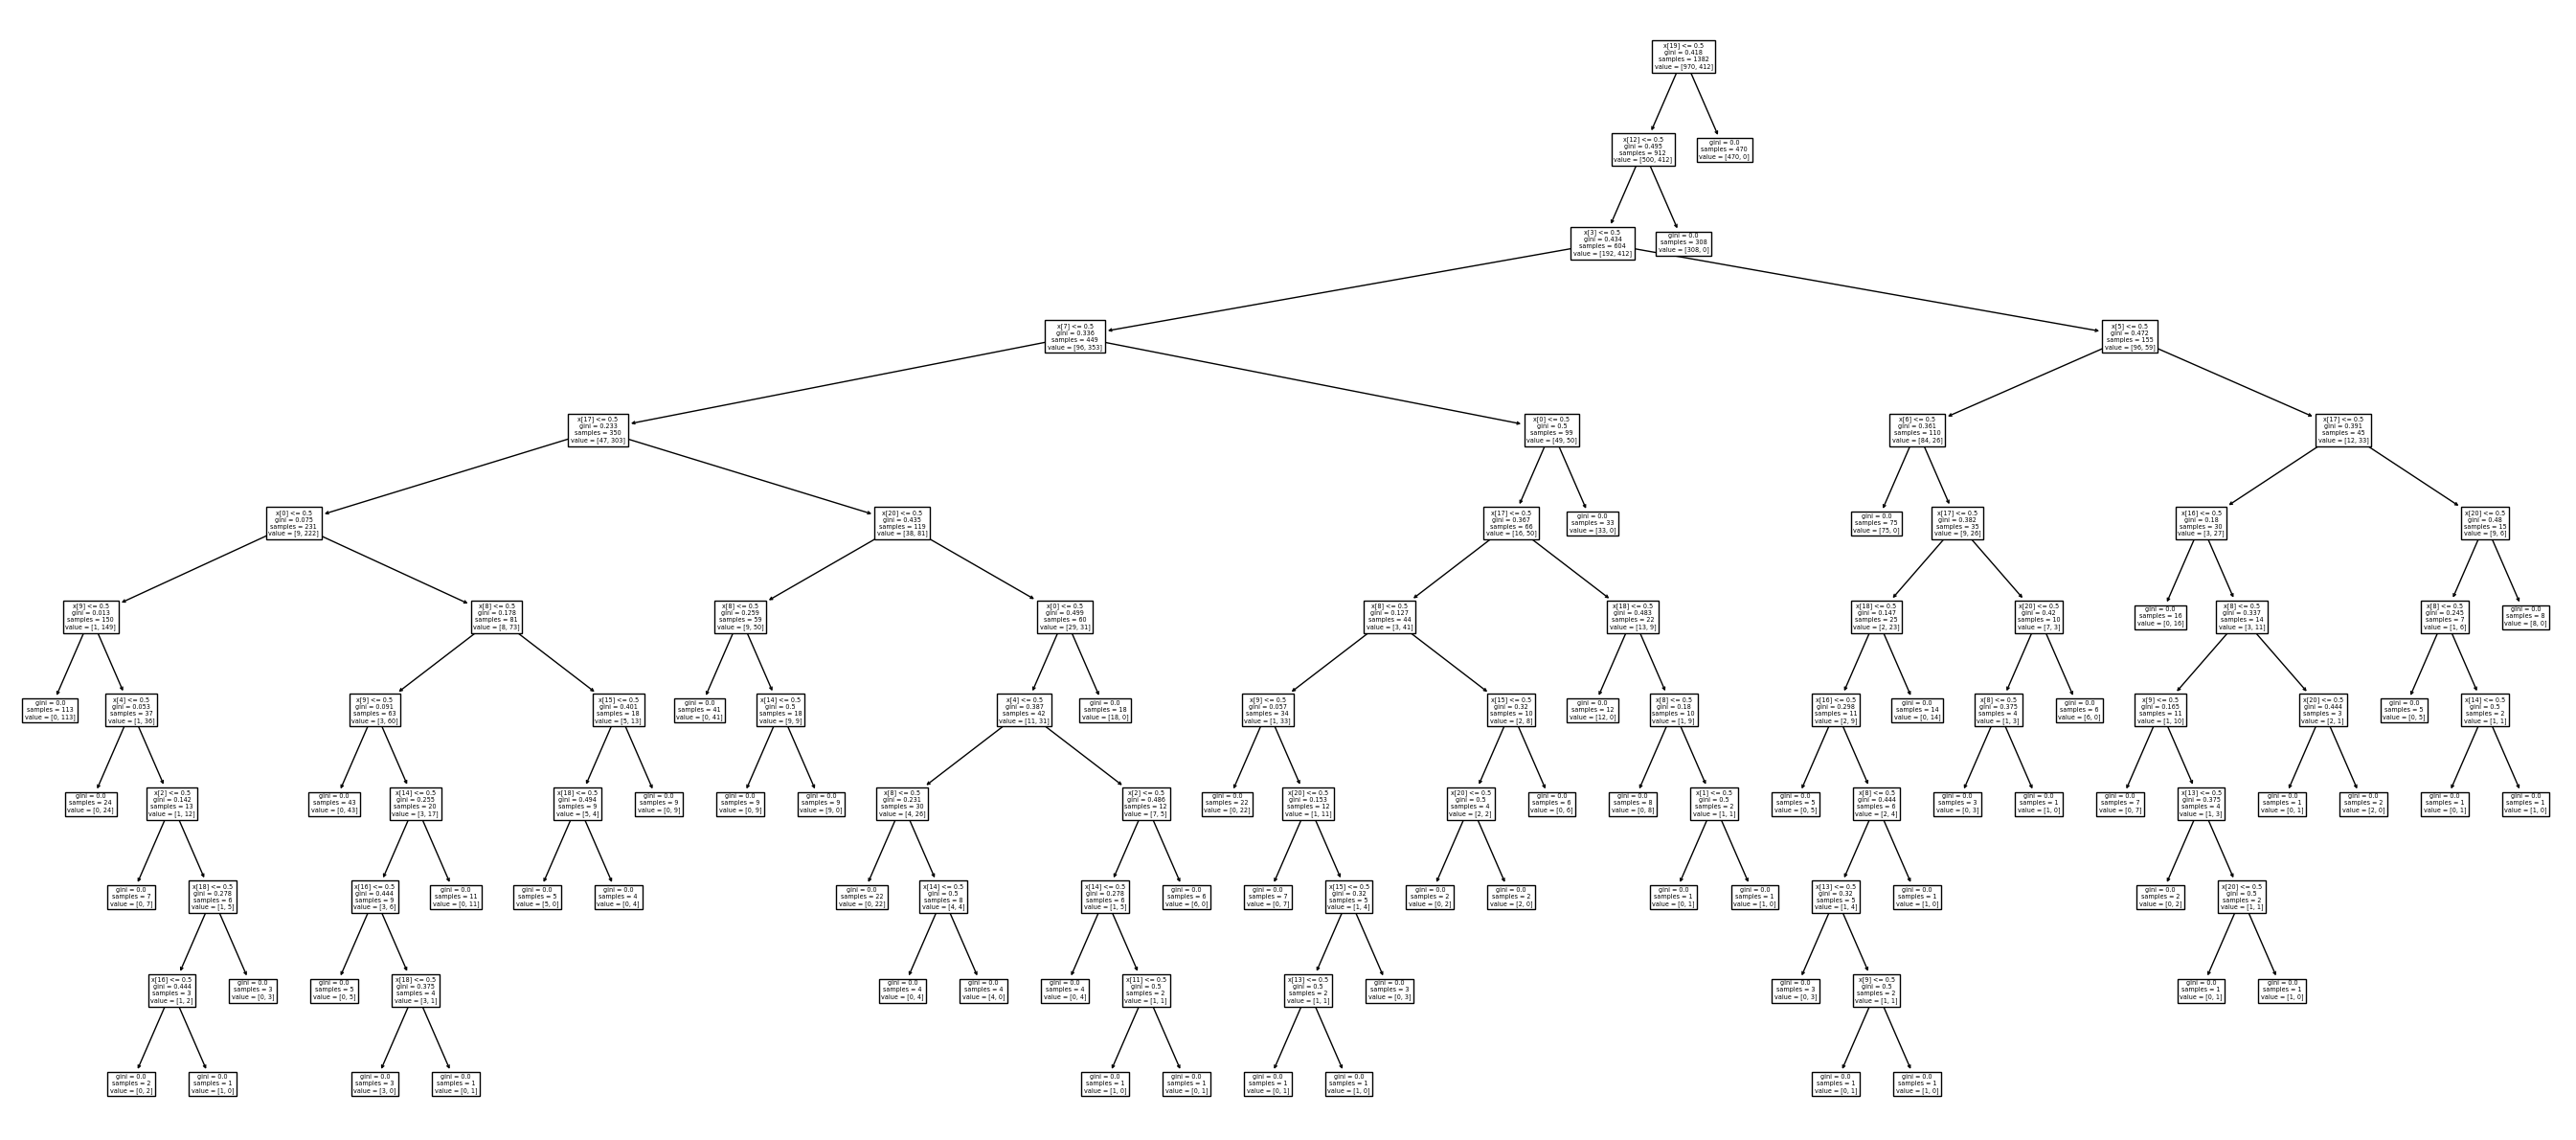

In [4]:
## Visualizing the tree
plt.figure(figsize=(27,12))
tree.plot_tree(dtree)
plt.tight_layout()
plt.show()

In [5]:
# Text-based visualization of the tree (View this in the Output terminal!)
print(tree.export_text(dtree))

|--- feature_19 <= 0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |  

In [6]:
import datetime

current_date = datetime.datetime.now().strftime("%Y年%m月%d日")
print(f"更新日期: {current_date}")

更新日期: 2024年11月30日
